<a href="https://colab.research.google.com/github/CabritaVm/AAproject/blob/main/reglinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
!pip install pandas
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Script do projeto final de Aprendizagem Automática**

ESTBarreiro - IPS

Bioinformatica

Junho 2023

2ºAno , 2ºSemestre

UC: Aprendizagem Automática (Machine Learning)

Trabalho realizado por:
Diogo Cabrita nº202000212 /
Tiago Beja nº 202000197

Professor:
António Gonçalves

##**1.Imports necessários para a exploração e análise**

In [2]:

##Este script usa o dataset "online+news+popularity.csv" como base de trabalho.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score




##**2. Carregamento do dataset**

In [3]:
!curl https://raw.githubusercontent.com/CabritaVm/AAproject/main/projetoaa/OnlineNewsPopularity.csv >> OnlineNewsPopularity.csv
df = pd.read_csv('OnlineNewsPopularity.csv')

print(df.head())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.1M  100 23.1M    0     0  73.3M      0 --:--:-- --:--:-- --:--:-- 73.1M


<ipython-input-3-8888a2f1c9b6>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('OnlineNewsPopularity.csv')


                                                 url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0          0.57513               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1     

In [4]:
#Verificar se estava tudo correto através da tabela sendo mais facil de observar os dados
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0,0.5,0.0,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.57513,1.0,0.663866,3.0,1.0,1.0,...,0.1,1.0,-0.466667,-0.8,-0.133333,0.0,0.0,0.5,0.0,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.6,-0.166667,0.0,0.0,0.5,0.0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.54089,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.5,-0.05,0.454545,0.136364,0.045455,0.136364,505


In [5]:
print(df.dtypes)
##Verificar o tipo de variável

url                              object
 timedelta                       object
 n_tokens_title                  object
 n_tokens_content                object
 n_unique_tokens                 object
                                  ...  
 title_subjectivity              object
 title_sentiment_polarity        object
 abs_title_subjectivity          object
 abs_title_sentiment_polarity    object
 shares                          object
Length: 61, dtype: object


In [6]:
for column in df.columns:
     df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)
##Foi necessario pois a variavel 'url' aparecia em object então trocamos para float

url                              float64
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                          float64
Length: 61, dtype: object


In [7]:
print(df.dtypes)
##Verificar o tipo de variável

url                              float64
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                          float64
Length: 61, dtype: object


##**3.Detetar a Missing data**

In [8]:

pd.set_option('display.max_rows', None)
df.isnull().sum()
#Através do display.max_rows é possivel analisar todas as rows existentes de outra forma, não aparecem todas

url                               634319
 timedelta                            15
 n_tokens_title                       15
 n_tokens_content                     15
 n_unique_tokens                      15
 n_non_stop_words                     15
 n_non_stop_unique_tokens             15
 num_hrefs                            15
 num_self_hrefs                       15
 num_imgs                             15
 num_videos                           15
 average_token_length                 15
 num_keywords                         15
 data_channel_is_lifestyle            15
 data_channel_is_entertainment        15
 data_channel_is_bus                  15
 data_channel_is_socmed               15
 data_channel_is_tech                 15
 data_channel_is_world                15
 kw_min_min                           15
 kw_max_min                           15
 kw_avg_min                           15
 kw_min_max                           15
 kw_max_max                           15
 kw_avg_max     

In [9]:

df = df.drop(columns = 'url')
##Drop do url pois os valores são String e o objetivo é regressão linear

In [10]:
from sklearn.impute import SimpleImputer

  #Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

 #Replace NAs with column means
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



In [11]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

In [12]:
##Trocar a Missing Data
##Neste parte do projeto era suposto alterar os missing values/data mas como se pode observar neste caso não existe missing values

In [13]:
#Informação adicional:
# Número e tipo de características
num_caracteristicas = df.shape[1]
tipos_caracteristicas = df.dtypes
print("Número de características:", num_caracteristicas)


# Número de amostras
num_amostras = df.shape[0]
print("Número de amostras:", num_amostras)



Número de características: 60
Número de amostras: 634319


In [14]:
df.shape
##Tamanho do dataset

(634319, 60)

In [15]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,...,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000,634319.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.158703,2.113987,471.096367,3.520625,5.231107,3.264739,11.331749,3.855050,8.309237,4.107758,...,0.071313,0.247780,0.127723,0.290283,0.095371,0.324240,0.265444,0.188786,0.226289,11626.675798
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470874,1.000000,0.625746,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328382,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539235,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [16]:
print(df.columns)
#Ver todas as colunas e variáveis

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [17]:
print(df.dtypes)
##Verificar o tipo de variável

 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       float64
 kw_avg_max                       

##**4.Análise de duas variáveis através de um histograma**

In [18]:
##Primeiro temos de ver se tem valores NAs
# Mostra o DataFrame com os valores preenchidos
print(df.head())

    timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0              219.0          0.663594   
1       731.0              9.0              255.0          0.604743   
2       731.0              9.0              211.0          0.575130   
3       731.0              9.0              531.0          0.503788   
4       731.0             13.0             1072.0          0.415646   

    n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   num_self_hrefs  \
0                1.0                   0.815385         4.0              2.0   
1                1.0                   0.791946         3.0              1.0   
2                1.0                   0.663866         3.0              1.0   
3                1.0                   0.665635         9.0              0.0   
4                1.0                   0.540890        19.0             19.0   

    num_imgs   num_videos  ...   min_positive_polarity  \
0        1.0          0.0  ...    

In [19]:
##Criação dos modelos de histogramas

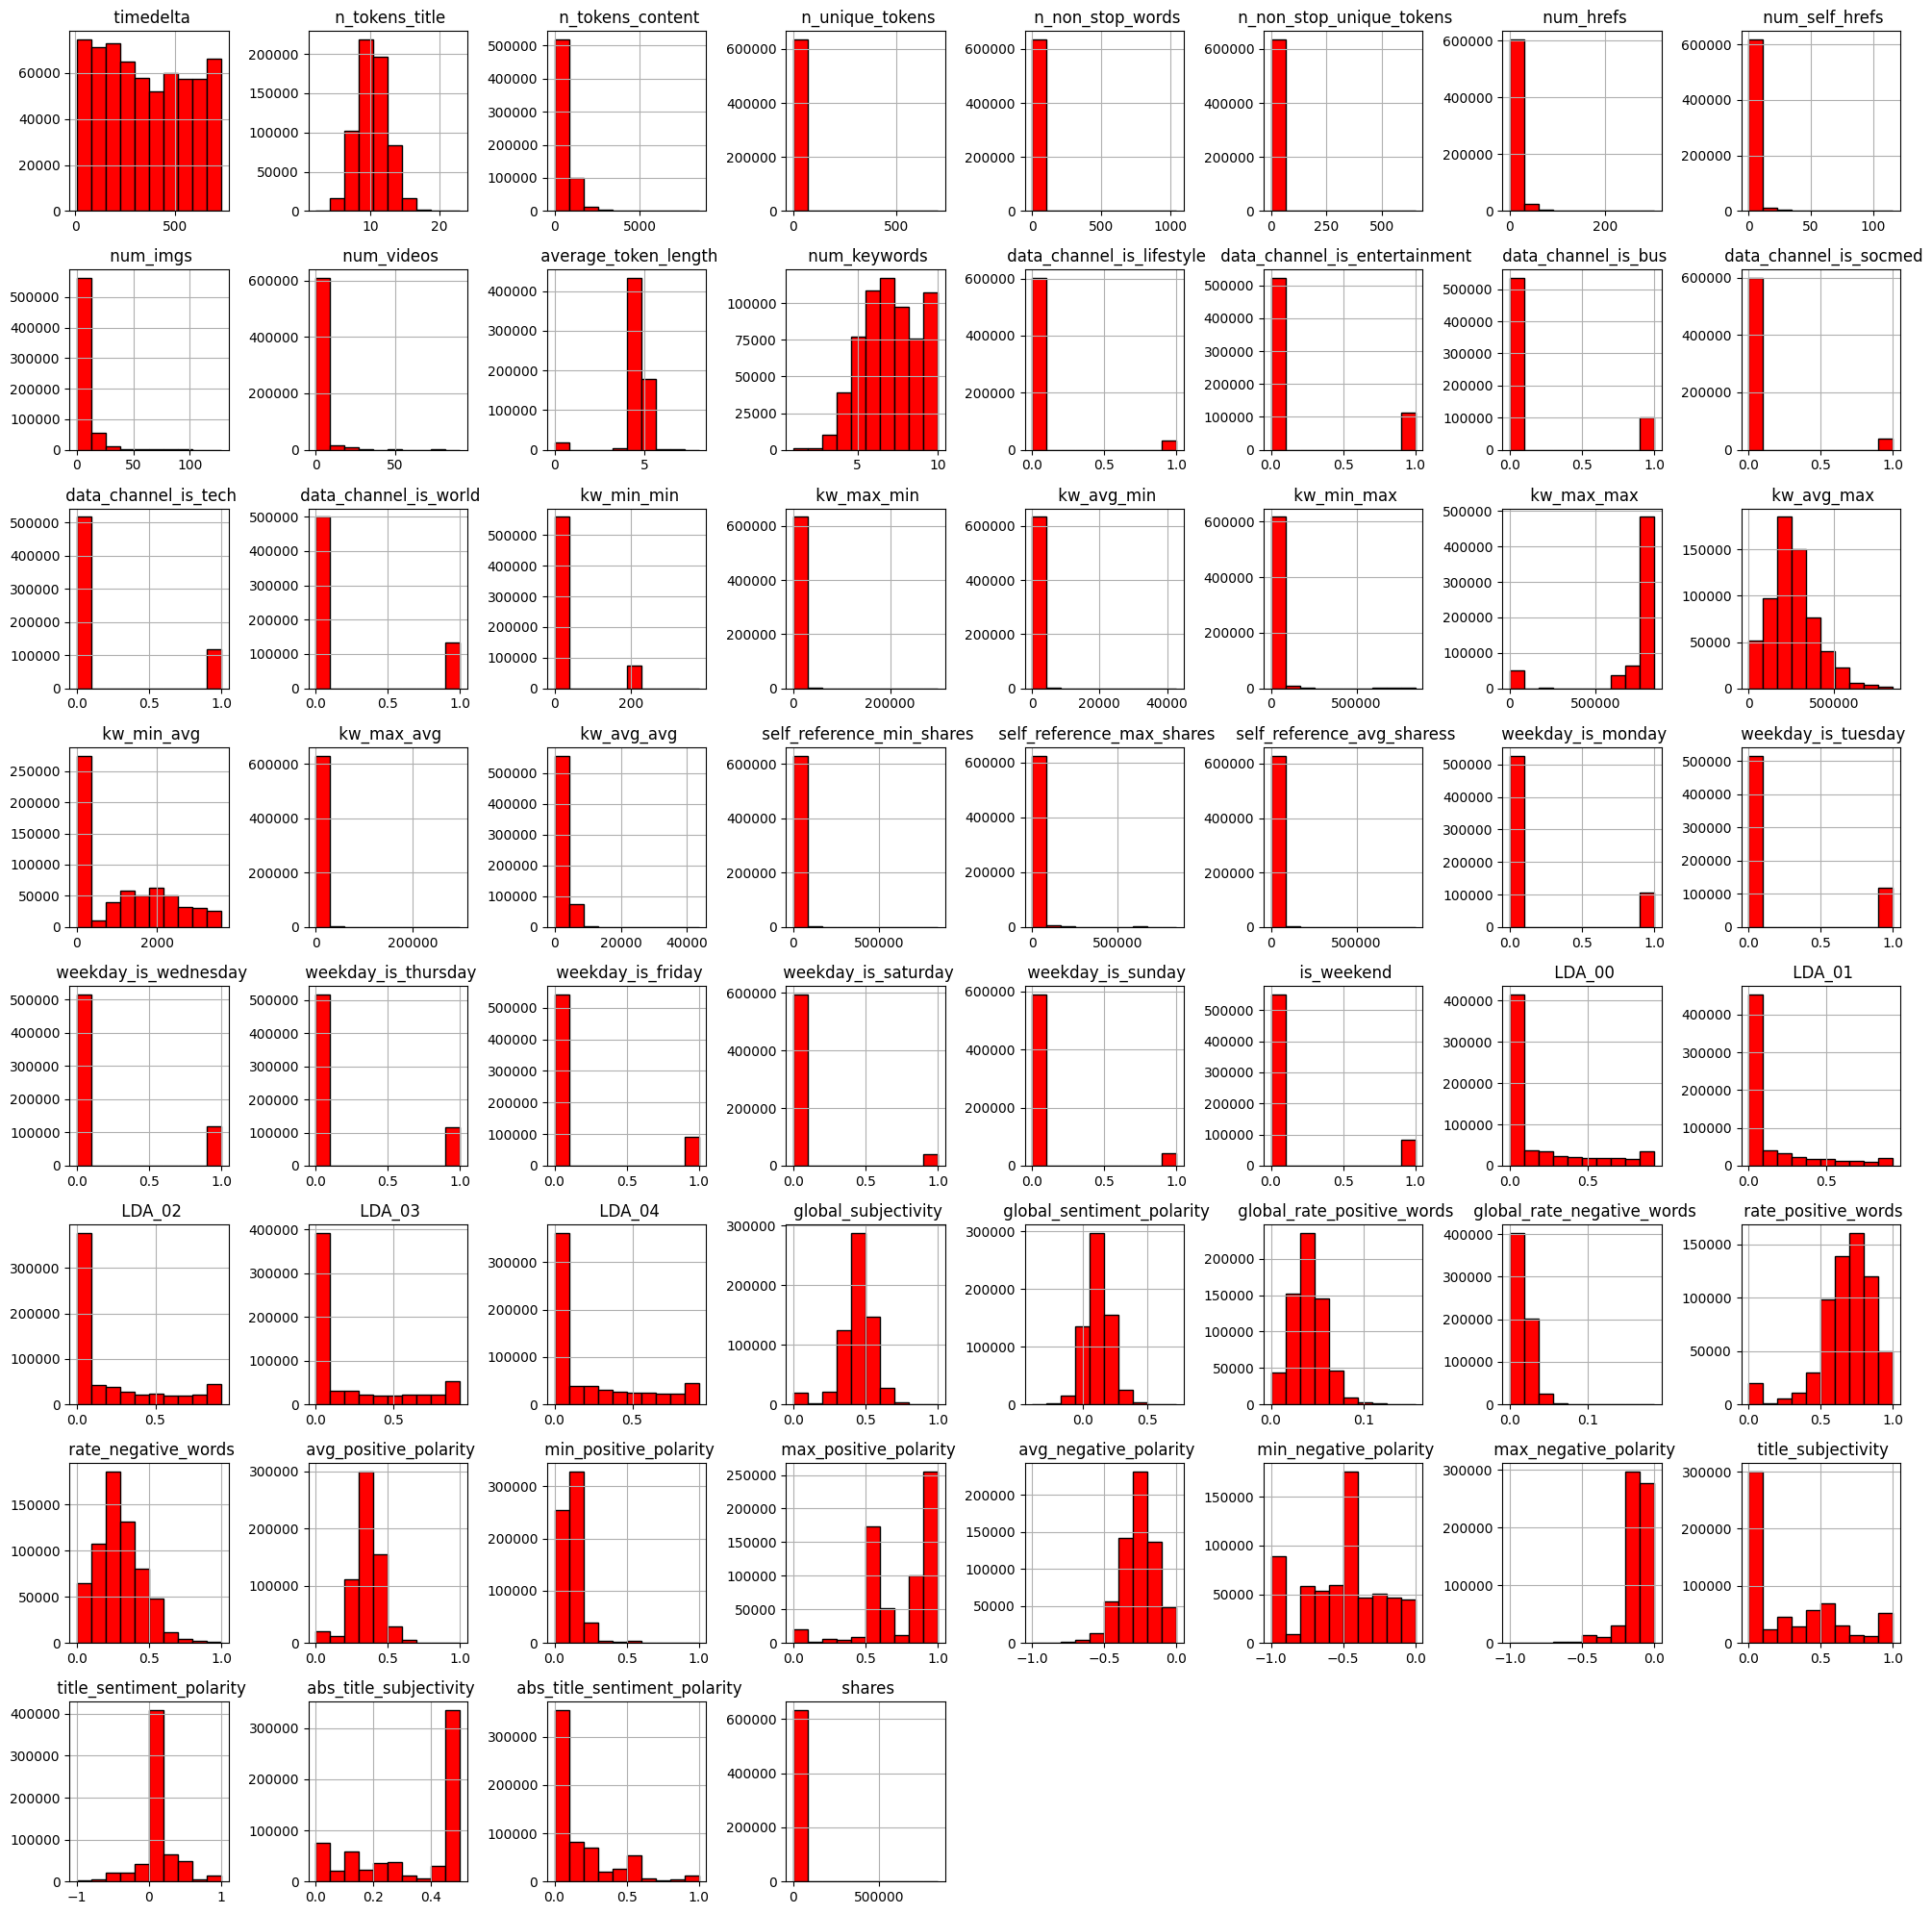

In [20]:
# Obter a lista de colunas numericas
num_cols = df.select_dtypes(include=['float64']).columns

# Criar o histograma para cada coluna
df[num_cols].hist(figsize=[20, 20], bins=10, color='red', histtype='bar', edgecolor='black')

# Ajustar o espaciamente entre os subplots
plt.tight_layout()

# Mostra os plots
plt.show()

In [21]:
##Melhores modelos para Histogramas

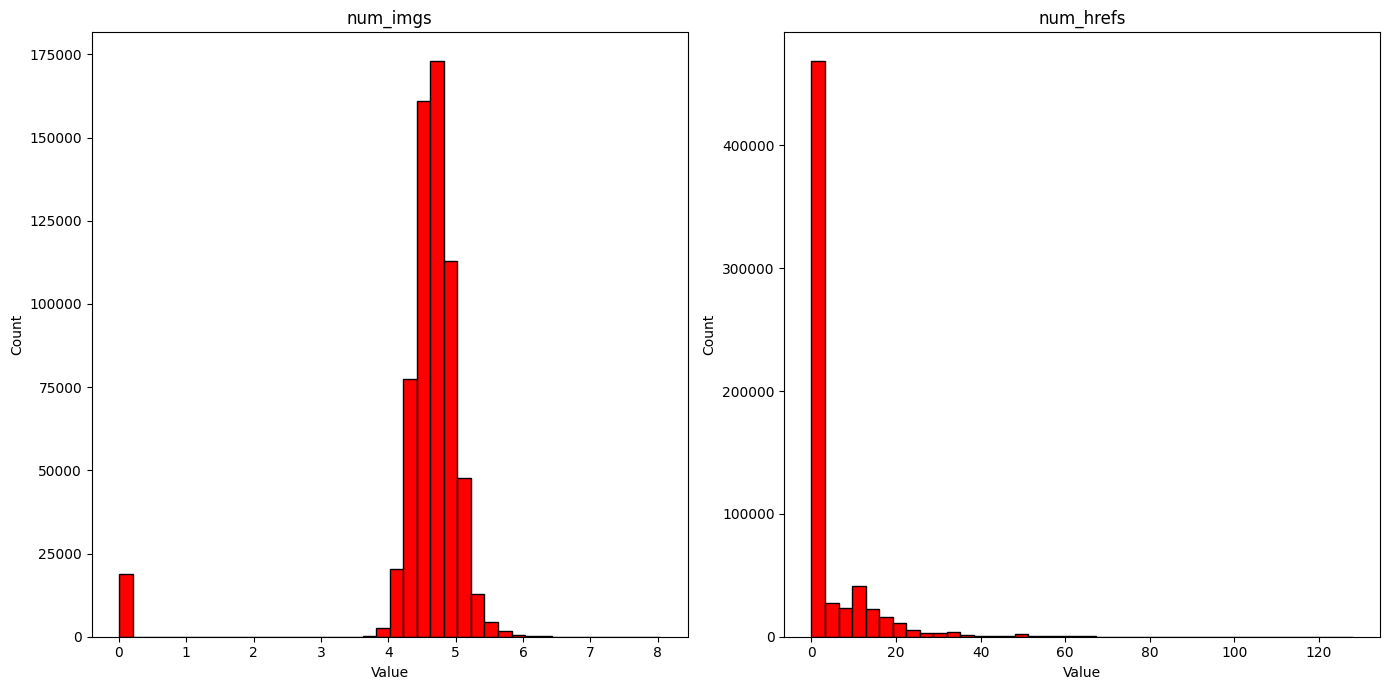

In [22]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot histogram for column1
counts1, bins1, patches1 = axs[0].hist(df.iloc[:, 10], bins=40, color='red', edgecolor='black')
axs[0].set_title('num_imgs')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Count')

# Plot histogram for column2
counts2, bins2, patches2 = axs[1].hist(df.iloc[:, 8], bins=40, color='red', edgecolor='black')
axs[1].set_title('num_hrefs')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
##Seleção das variaveis para o modelo

##**5.Seleção das variaveis para o modelo**

In [24]:

# Selecionar os recursos e as variáveis de destino com base nos índices
feature_columns = [' timedelta', ' n_tokens_title', ' n_tokens_content',
                   ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
                   ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
                   ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
                   ' data_channel_is_entertainment', ' data_channel_is_bus',
                   ' data_channel_is_socmed', ' data_channel_is_tech',
                   ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
                   ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
                   ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
                   ' self_reference_max_shares', ' self_reference_avg_sharess',
                   ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
                   ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
                   ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
                   ' LDA_03', ' LDA_04', ' global_subjectivity',
                   ' global_sentiment_polarity', ' global_rate_positive_words',
                   ' global_rate_negative_words', ' rate_positive_words',
                   ' rate_negative_words', ' avg_positive_polarity',
                   ' min_positive_polarity', ' max_positive_polarity',
                   ' avg_negative_polarity', ' min_negative_polarity',
                   ' max_negative_polarity', ' title_subjectivity',
                   ' title_sentiment_polarity', ' abs_title_subjectivity',
                   ' abs_title_sentiment_polarity']

X = df[feature_columns].values
y = df[' shares'].values

print(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



[[ 7.31000000e+02  1.20000000e+01  2.19000000e+02 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 7.31000000e+02  9.00000000e+00  2.55000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 7.31000000e+02  9.00000000e+00  2.11000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 8.00000000e+00  1.00000000e+01  4.42000000e+02 ...  1.36363636e-01
   4.54545455e-02  1.36363636e-01]
 [ 8.00000000e+00  6.00000000e+00  6.82000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 8.00000000e+00  1.00000000e+01  1.57000000e+02 ...  2.50000000e-01
   1.66666667e-01  2.50000000e-01]]


In [25]:
print(X)  ## todas as features menos target

[[ 7.31000000e+02  1.20000000e+01  2.19000000e+02 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 7.31000000e+02  9.00000000e+00  2.55000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 7.31000000e+02  9.00000000e+00  2.11000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 8.00000000e+00  1.00000000e+01  4.42000000e+02 ...  1.36363636e-01
   4.54545455e-02  1.36363636e-01]
 [ 8.00000000e+00  6.00000000e+00  6.82000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 8.00000000e+00  1.00000000e+01  1.57000000e+02 ...  2.50000000e-01
   1.66666667e-01  2.50000000e-01]]


In [26]:
print(y) ##target

[ 593.  711. 1500. ... 1900. 1100. 1300.]


##**6.Criação do modelo de regressão linear**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 145414066.96680433
R-squared: 0.021292282380332428


In [28]:
## Criação do gráfico de regressão linear

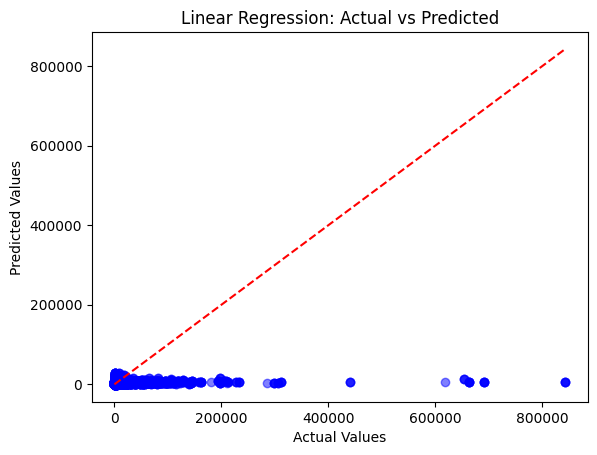

In [29]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a regression tree model with max_depth=20
model = DecisionTreeRegressor(max_depth=20)
#Diminui a depth para pudar a arvore de forma a melhorar o modelo

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 8277733.131290778
R-squared: 0.9442868116614899


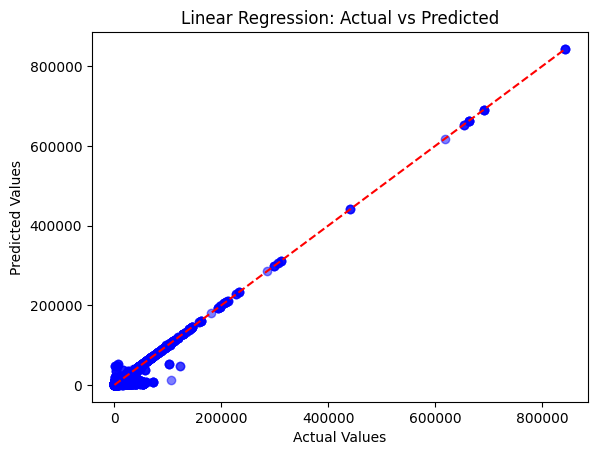

In [35]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()